# regression

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
rng = np.random.default_rng(seed = 42)

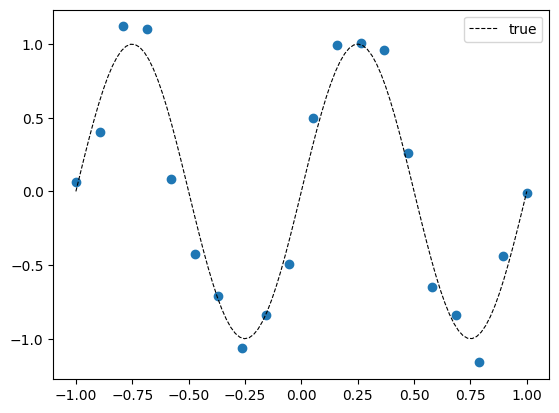

In [29]:
n = 20
x = np.linspace(-1 , 1,n)
x_vis = np.linspace(-1,1,100)
y_vis = np.sin(2*np.pi*x_vis)  
y = np.sin(2*np.pi*x) + rng.normal(0,0.2,n)
plt.plot(x_vis,y_vis , linestyle = '--' , linewidth = '0.8',color = 'black', label = 'true')
plt.scatter(x,y)
plt.legend()

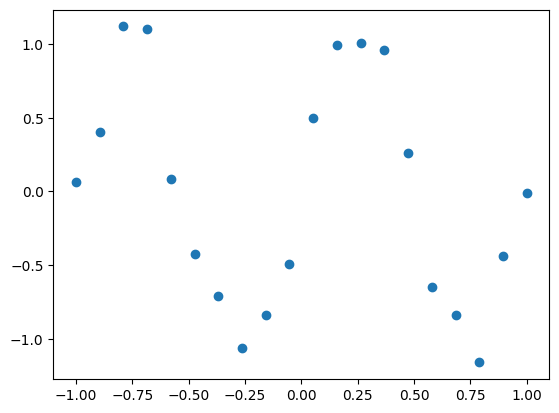

In [30]:
plt.scatter(x,y)

## data

In [ ]:
print(X.shape)


(20,)


In [43]:
dataframe = pd.DataFrame(X.T)
dataframe['target'] = y
dataframe

,0,1,2,3,4,5,6,target
0,1.0,-1.000000,1.000000,-1.000000,1.000000,-1.000000e+00,1.000000e+00,0.060943
1,1.0,-0.894737,0.800554,-0.716285,0.640887,-5.734250e-01,5.130644e-01,0.406216
2,1.0,-0.789474,0.623269,-0.492054,0.388464,-3.066820e-01,2.421174e-01,1.119491
3,1.0,-0.684211,0.468144,-0.320309,0.219159,-1.499508e-01,1.025979e-01,1.103886
4,1.0,-0.578947,0.335180,-0.194052,0.112346,-6.504223e-02,3.765603e-02,0.085740
5,1.0,-0.473684,0.224377,-0.106284,0.050345,-2.384759e-02,1.129623e-02,-0.425030
6,1.0,-0.368421,0.135734,-0.050007,0.018424,-6.787693e-03,2.500729e-03,-0.710156
7,1.0,-0.263158,0.069252,-0.018224,0.004796,-1.262066e-03,3.321226e-04,-1.059833
8,1.0,-0.157895,0.024931,-0.003936,0.000622,-9.813824e-05,1.549551e-05,-0.840527
9,1.0,-0.052632,0.002770,-0.000146,0.000008,-4.038611e-07,2.125585e-08,-0.495308


# polynomial transformation

In [33]:
p = 6
X = np.array([x**i for i in range(p+1)])


## optimal weight vctor
w = (x.t)^pusdo_inverse @ y

In [34]:
w = np.linalg.pinv(X.T) @ y
w

array([  0.0600497 ,   4.19253249,  -0.87239369, -17.46584281,
         1.84296835,  13.51357066,  -1.0159285 ])

In [35]:
np.linalg.pinv(X@X.T)@ X @ y 

array([  0.0600497 ,   4.19253249,  -0.87239369, -17.46584281,
         1.84296835,  13.51357066,  -1.0159285 ])

In [36]:
y_predict_vis = np.array([x_vis**i for i in range(p+1)]).T @ w
y_predict = np.array([x**i for i in range(p+1)]).T @ w
 #(20,1)

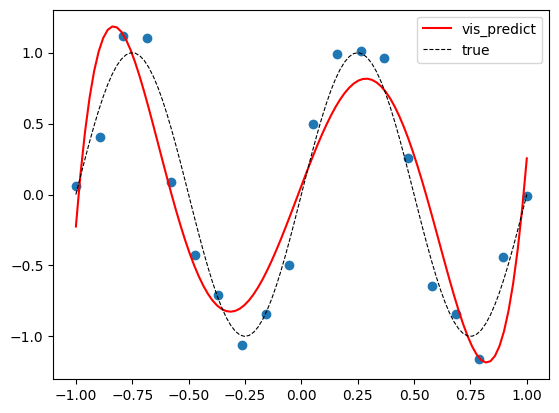

In [37]:
plt.plot(x_vis , y_predict_vis ,color = 'red', label = 'vis_predict')
# plt.plot(x , y_predict , label = 'original_predict')
plt.plot(x_vis,y_vis , linestyle = '--' , linewidth = '0.8',color = 'black', label = 'true')
plt.scatter(x,y)
plt.legend()

## Loss Function

In [38]:
def loss(x,y,w):
    d , n = X.shape
    err = X.T @ w - y
    return (err**2).sum()/n

In [39]:
loss(X,y,w)

0.09413032555964515

# Gradient descent approch

We can approch optimization problem by gradient descent method.

In [56]:
d , n = X.shape
w_grad = np.zeros(d)
eta = 0.001 # learning rate
loss_his = [np.inf , 0]
tol = 1e-10
iter = 0
while abs(loss_his[-2]-loss_his[-1]) > tol:
    loss_his.append(loss(X , y , w_grad))
    grad = X @ X.T @ w_grad - X @ y
    w_grad = w_grad - eta * grad
    iter += 1
print(f"converged_after {iter}")
print(f"final weight vector {w_grad}")

converged_after 631800
final weight vector [  0.05468976   4.19239612  -0.77534276 -17.4652898    1.58336951
  13.51312798  -0.84407345]


In [51]:
w

array([  0.0600497 ,   4.19253249,  -0.87239369, -17.46584281,
         1.84296835,  13.51357066,  -1.0159285 ])